Polynomial Linear Regression Equation:

y = b0 + b1 * x + b2 * x^2 + b3 * x^3 + .....

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df=pd.read_csv(r'./csv/Student_Performance.csv')
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [3]:
df = df.drop_duplicates()

In [4]:
X=df[['Previous Scores']]
y=df['Performance Index']

In [5]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=3)

In [6]:
poly_feat = PolynomialFeatures(degree=2, include_bias=False)
X_train = poly_feat.fit_transform(X_train)
X_test = poly_feat.fit_transform(X_test)

In [7]:
X_train

array([[  71., 5041.],
       [  45., 2025.],
       [  46., 2116.],
       ...,
       [  48., 2304.],
       [  91., 8281.],
       [  72., 5184.]])

In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Text(0.5, 0, 'Performance')

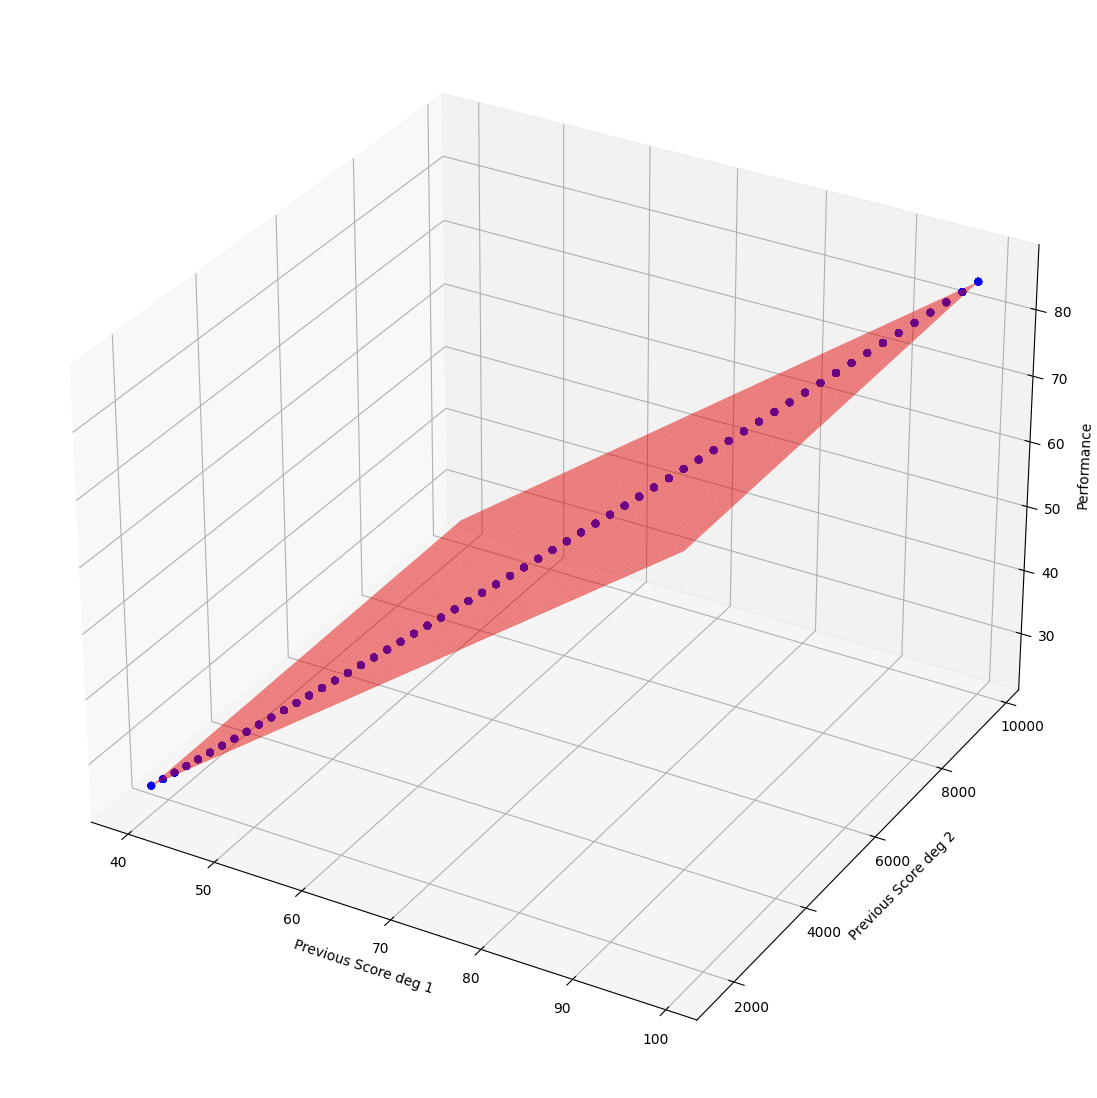

In [9]:
X1=X_test[:,0:1]
X2=X_test[:,1:2]
y_ = lr.predict(X_test)



X1_range = np.linspace(min(X1), max(X1), 100)
X2_range = np.linspace(min(X2), max(X2), 100)
X1_values, X2_values = np.meshgrid(X1_range, X2_range)

# Create an array of feature vectors for prediction
X_pred = np.c_[X1_values.ravel(), X2_values.ravel()]

# Predict y values for the meshgrid
y_pred = lr.predict(X_pred)
y_pred = y_pred.reshape(X1_values.shape)

# Create a 3D plot
fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of data points
ax.scatter(X1, X2, y_, c='blue', marker='o')

ax.plot_surface(X1_values, X2_values, y_pred, color='r', alpha=0.5)
ax.set_xlabel('Previous Score deg 1')
ax.set_ylabel('Previous Score deg 2')
ax.set_zlabel('Performance')

In [10]:
import plotly.graph_objects as go
scatter = go.Scatter3d(
    x=X1.ravel(),
    y=X2.ravel(),
    z=y_.ravel(),
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='Data Points'
)

# Create the surface plot for the regression model
surface = go.Surface(
    x=X1_values,
    y=X2_values,
    z=y_pred,
    colorscale='RdBu',
    opacity=0.8,
    name='Regression Model'
)

fig = go.Figure(data=[scatter, surface])

fig.update_layout(scene=dict(xaxis_title='Hours Studied', yaxis_title='Previous Score', zaxis_title='Performance'))

In [11]:
lr.score(X_test,y_test)

0.8337819013020402